![](diamond1.jpg)

# <span style="color:blue  "><b>Internship September 2024</b></span>
## <span style="color:skyblue  "><b>Innomatics Research Labs</span>
## <b>TASK - 5</b>
## <b><u>Diamond Price Prediction</u>


#### <b>Problem Statement
##### Create a Machine Learning Model that can predict a price of Diamond ,based on certain features

### <b>DATA DESCRIPTION</b>
#### Feature  :  Description
<hr></hr>
<b>price</b> :	price in US dollars ($ 326 - $ 18,823)<hr></hr>
<b>carat</b> :	weight of the diamond (0.2 - 5.01)<hr></hr>
<b>cut</b>   :	quality of the cut (Fair, Good, Very Good, Premium, Ideal)<hr></hr>
<b>color</b> :	diamond colour, (J (worst) to D (best))<hr></hr>
<b>clarity</b> :	a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<hr></hr>
<b>x</b> :	length in mm (0 - 10.74)<hr></hr>
<b>y</b> :	width in mm (0 - 58.9)<hr></hr>
<b>z</b> :	depth in mm (0 - 31.8)<hr></hr>
<b>depth</b> :	total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)<hr></hr>
<b>table</b> :	width of top of diamond relative to widest point (43 - 95)

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
df=pd.read_csv("diamonds.csv")

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Exploratory Data Analysis

In [13]:
df.shape

(53940, 10)

In [15]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
# Univariate Analysis

In [21]:
# Separating Categorical and Numerical Columns

cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(include=['int64', 'float64'])

In [23]:
cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [25]:
num.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [27]:
# Univariate - Categorical- Non Visual

In [29]:
print("cut", df['cut'].unique())
print("color", df['color'].unique())
print("clarity", df['clarity'].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [31]:
print("Count of cut : ",df['cut'].nunique())      #cardinality

Count of cut :  5


In [33]:
print("Count of color : ", df['color'].nunique())       #cardinality

Count of color :  7


In [35]:
print("Count of clarity : ", df['clarity'].nunique())       #cardinality

Count of clarity :  8


In [37]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [39]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [41]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

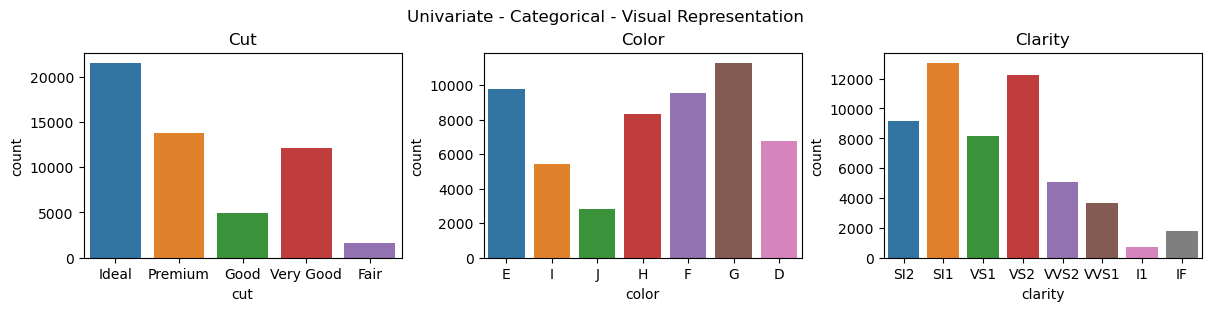

In [43]:
# Univariate - Categorical - Visual

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate - Categorical - Visual Representation")

axs[0].set_title("Cut")
sns.countplot(data=df, x='cut', ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data=df, x='color', ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data=df, x='clarity', ax=axs[2])

In [45]:
# Univaraite - Numerical - Non Visual
#num.columns
summary=df[num.columns].describe()
print(summary)

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [47]:
df['price'].median()

2401.0

<Axes: title={'center': 'Table'}, xlabel='table'>

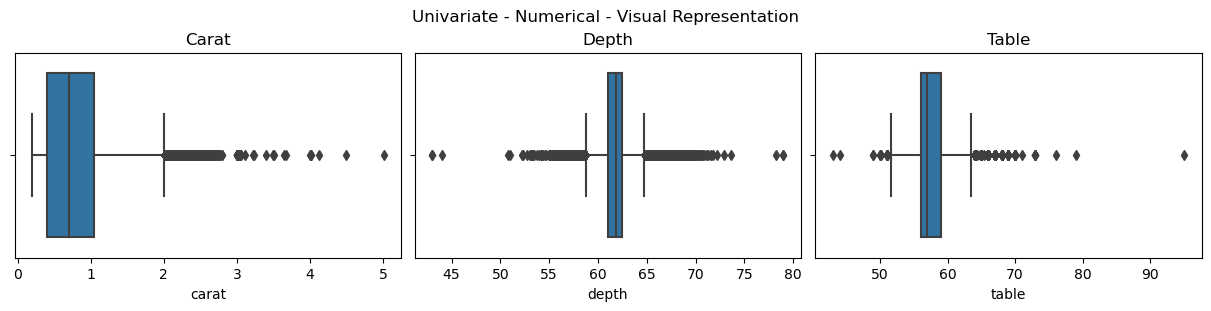

In [49]:
# Univariate - Numerical - Visual

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate - Numerical - Visual Representation")

axs[0].set_title("Carat")
sns.boxplot(data=df, x='carat', ax=axs[0])

axs[1].set_title("Depth")
sns.boxplot(data=df, x='depth', ax=axs[1])

axs[2].set_title("Table")
sns.boxplot(data=df, x='table', ax=axs[2])

<Axes: title={'center': 'Z'}, xlabel='z', ylabel='Count'>

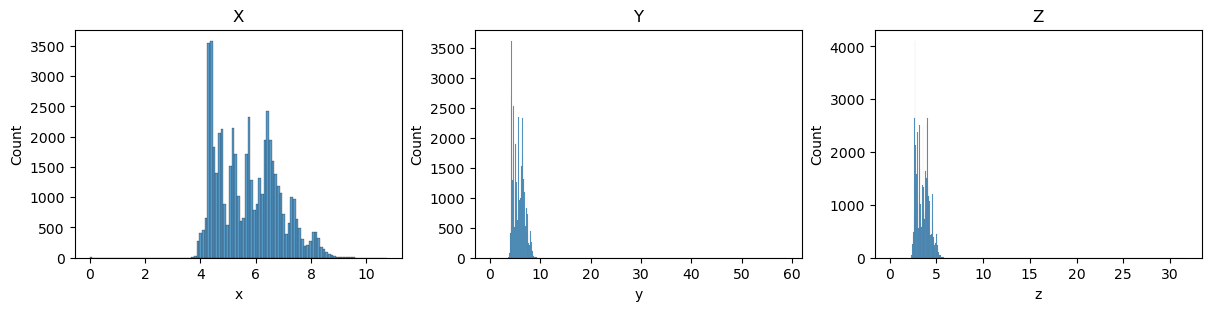

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)

axs[0].set_title("X")
sns.histplot(data=df, x='x', ax=axs[0])

axs[1].set_title("Y")
sns.histplot(data=df, x='y', ax=axs[1])

axs[2].set_title("Z")
sns.histplot(data=df, x='z', ax=axs[2])

<Axes: xlabel='price', ylabel='Count'>

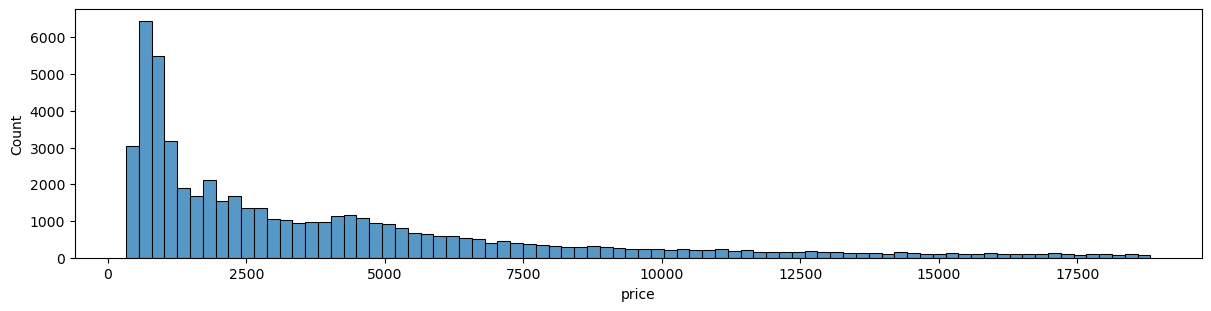

In [53]:
fig = plt.subplots(figsize=(12, 3), constrained_layout=True)
sns.histplot(data=df, x='price')

In [55]:
# Bivariate Visual
# Numerical-Numerical  Categorical-Numerical Categorical-Categorical

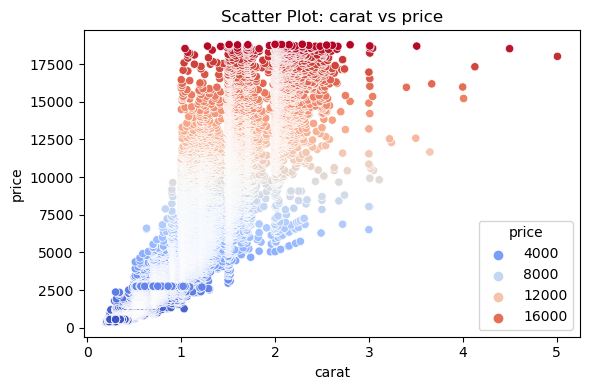

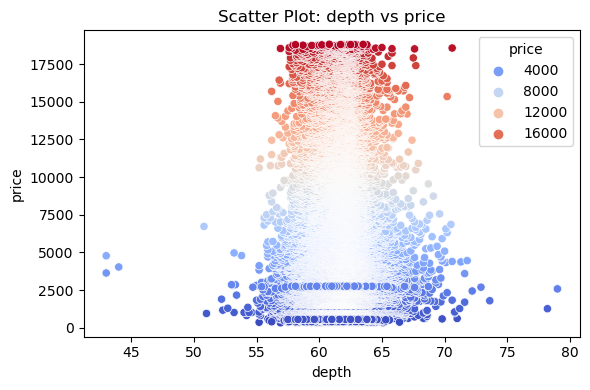

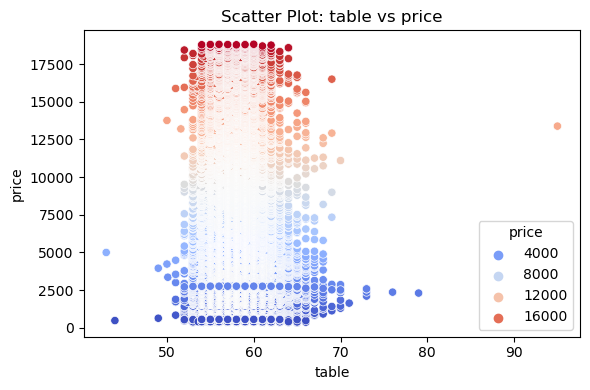

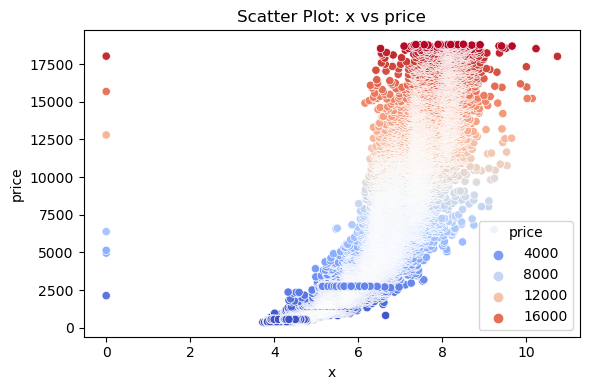

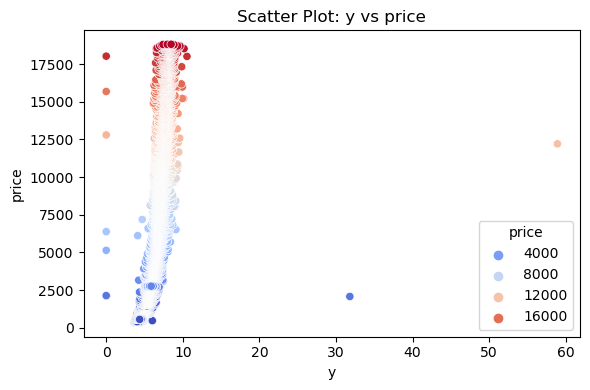

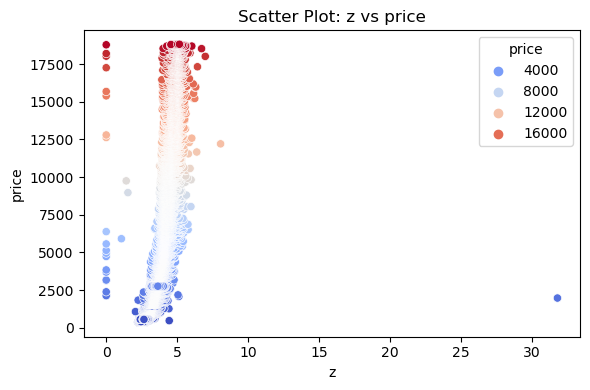

In [57]:
# Bivariate - Numerical vs Numerical Analysis
# Function to plot scatter plots for key variables
def plot_scatter(df, col1, col2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col1], y=df[col2], hue=df['price'], palette='coolwarm')
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

# Scatter plot examples between key variables
def scatter_plots(df):
    key_scatter_pairs = [
        ('carat', 'price'),
        ('depth', 'price'),
        ('table', 'price'),
        ('x', 'price'),
        ('y', 'price'),
        ('z', 'price')
    ]

    # Plot scatter plots for each pair
    for col1, col2 in key_scatter_pairs:
        plot_scatter(df, col1, col2)
        
# Plot scatter plots for key pairs
scatter_plots(df)

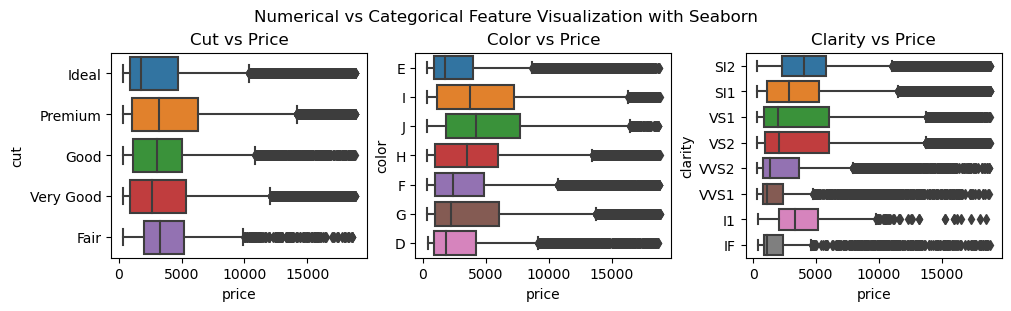

In [59]:
# Bivariate - Categorical vs Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x='price', y='cut', ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df, x='price', y='color', ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df, x='price', y='clarity', ax=axs[2])

plt.show()

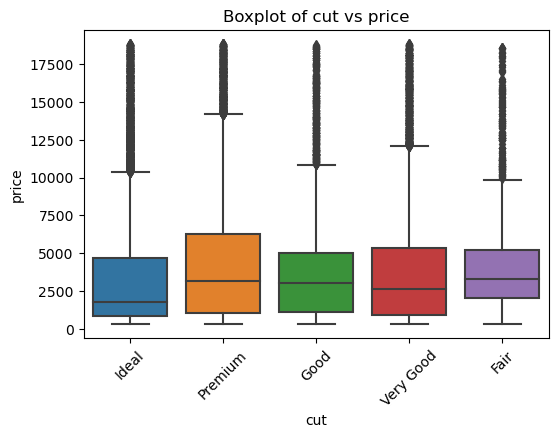

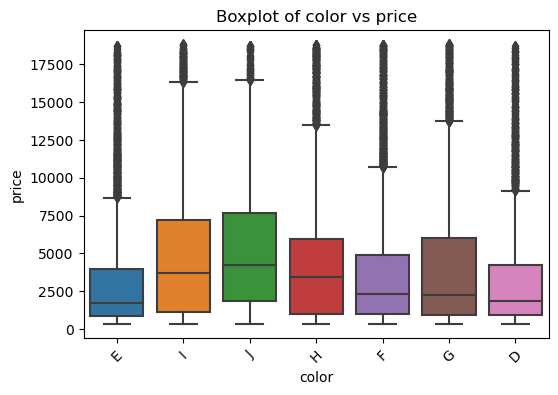

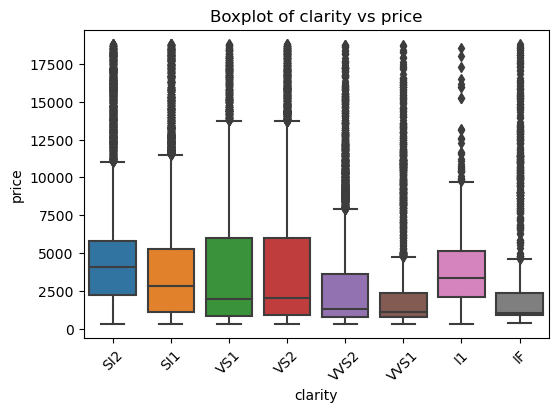

In [61]:
#Numerical v/s Categorical
def plot_box(df, col1, col2):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col1], y=df[col2], data=df)
    plt.title(f'Boxplot of {col1} vs {col2}')
    plt.xticks(rotation=45)
    plt.show()
    

# Scatter plot examples between key variables
def box_plots(df):
    key_box_pairs = [
        ('cut', 'price'),
        ('color', 'price'),
        ('clarity', 'price'),
    ]

    # Plot scatter plots for each pair
    for col1, col2 in key_box_pairs:
        plot_box(df, col1, col2)
        
# Plot scatter plots for key pairs
box_plots(df)
# # Plotting the boxplot for 'price' vs 'cut' columns
# plt.figure(figsize=(6, 4))
# sns.boxplot(x='cut', y='price', data=df)
# plt.title("Boxplot of price vs cut")
# plt.xticks(rotation=45)
# plt.show()

In [64]:
import sklearn


In [66]:
print(sklearn.__version__)

1.3.0


In [68]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [70]:
# Defining the predictors (X) and target variable (y)

X = df.drop(columns=['price'])
y = df['price']

In [72]:
print(X.head())

   carat      cut color clarity  depth  table     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75


In [74]:
print(y.head)

<bound method NDFrame.head of 0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64>


In [76]:
#Split the data into Train and Test
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#train- 37758

(37758, 9) (37758,)
(16182, 9) (16182,)


In [80]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# #train-43152

In [82]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

#test-13485

In [84]:
# Apply Data Preparation on Train Data
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [86]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [88]:
print(X_train_cat.columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [90]:
print(X_train_num.columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [92]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.798382,61.755400,57.450395,5.731836,5.735508,3.539432
std,0.474686,1.434428,2.232648,1.123175,1.155063,0.711150
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000


In [94]:
print(X_train_cat.columns.nunique())

3


In [96]:
print(X_train_num.columns.nunique())

6


In [98]:

# Rescaling - Numerical Features Transformation - Normalization
from sklearn.preprocessing import MinMaxScaler

In [100]:
min_max_scaler = MinMaxScaler()

In [102]:
X_train_num_transform = pd.DataFrame(min_max_scaler.fit_transform(X_train_num), columns = min_max_scaler.get_feature_names_out(), index = X_train_num.index)

In [104]:
X_train_num_transform.head()

,carat,depth,table,x,y,z
16259,0.168399,0.527778,0.388889,0.599628,0.107980,0.124843
24005,0.278586,0.544444,0.361111,0.690875,0.124788,0.145283
12211,0.197505,0.558333,0.555556,0.617318,0.110866,0.130503
37918,0.043659,0.488889,0.388889,0.445996,0.082173,0.091824
181,0.070686,0.513889,0.388889,0.487896,0.089304,0.101572


In [106]:
print("Number of Numerical Features:", min_max_scaler.n_features_in_)
print("Feature Names:", min_max_scaler.get_feature_names_out())
print("Minimum of each feature:", min_max_scaler.data_min_)
print("Maximum of each feature:", min_max_scaler.data_max_)

Number of Numerical Features: 6
Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Minimum of each feature: [ 0.2 43.  43.   0.   0.   0. ]
Maximum of each feature: [ 5.01 79.   79.   10.74 58.9  31.8 ]


In [108]:
X_train_num_transform.describe()

,carat,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.124404,0.520983,0.401400,0.533691,0.097377,0.111303
std,0.098687,0.039845,0.062018,0.104579,0.019611,0.022363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.502778,0.361111,0.438547,0.080136,0.091509
50%,0.103950,0.525000,0.388889,0.530726,0.096944,0.110692
75%,0.174636,0.541667,0.444444,0.608939,0.111036,0.127044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
# Rescaling - Numerical Features Transformation - Standardization

In [112]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [114]:
X_train_num_transform = pd.DataFrame(std_scaler.fit_transform(X_train_num), columns = std_scaler.get_feature_names_out(), index = X_train_num.index)

X_train_num_transform.head()

,carat,depth,table,x,y,z
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121


In [116]:
print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79838154 61.75540018 57.45039462  5.73183617  5.73550797  3.53943191]
Std of each column: [0.47467969 1.43440888 2.23261859 1.1231597  1.15504794 0.71114055]


In [118]:
X_train_num_transform.describe().round(2)

,carat,depth,table,x,y,z
count,37758.00,37758.00,37758.00,37758.00,37758.00,37758.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.08,-6.47,-5.10,-4.97,-4.98
25%,-0.84,-0.46,-0.65,-0.91,-0.88,-0.89
50%,-0.21,0.10,-0.20,-0.03,-0.02,-0.03
75%,0.51,0.52,0.69,0.72,0.70,0.70
max,8.87,12.02,9.65,4.46,46.03,39.74


In [120]:
X_train_num_transform['table'].median()

-0.20173379401368655

In [122]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [124]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [126]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [128]:
# Rescaling - Categorical Features Transformation - Ordinal Encoding

# Defining the order of categorical features (lowest to highest)

cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [130]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  handle_unknown="use_encoded_value",unknown_value=-1, encoded_missing_value=-5)


In [132]:
X_train_cat_transform = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), columns=ordinal_encoder.get_feature_names_out(), index = X_train_cat.index)

In [134]:
X_train_cat_transform.head()

,cut,color,clarity
16259,4.0,3.0,4.0
24005,4.0,2.0,5.0
12211,2.0,5.0,1.0
37918,4.0,4.0,4.0
181,4.0,5.0,5.0


In [136]:
#Properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print(" ")
print("Unique Categories:", ordinal_encoder.categories_)
print(" ")
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
 
Unique Categories: [array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]
 
Feature Names after encoding: ['cut' 'color' 'clarity']


In [138]:
X_train_transform = pd.concat([X_train_num_transform, X_train_cat_transform], axis=1)

X_train_transform.head()

,carat,depth,table,x,y,z,cut,color,clarity
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,4.0,3.0,4.0
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,4.0,2.0,5.0
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,2.0,5.0,1.0
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040,4.0,4.0,4.0
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121,4.0,5.0,5.0


In [140]:
# Apply Data Preparation on Test Data

In [142]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [144]:
# Apply transformation on Numerical data

X_test_num_transform = pd.DataFrame(std_scaler.transform(X_test_num), columns = std_scaler.get_feature_names_out(), index = X_test_num.index)

X_test_num_transform.head()

,carat,depth,table,x,y,z
10176,0.635415,0.170523,-1.097543,0.781869,0.791735,0.802328
16083,1.035685,0.588814,-0.649638,1.093490,1.034149,1.139814
13420,0.846083,-0.456913,0.246171,1.022262,0.921600,0.900762
20407,1.478088,-0.596343,-0.649638,1.511952,1.406428,1.350743
8909,0.214078,-0.038622,-0.201734,0.390117,0.410799,0.394533


In [146]:
# Apply transformation on Categorical data

X_test_cat_transform = pd.DataFrame(ordinal_encoder.transform(X_test_cat), columns = ordinal_encoder.get_feature_names_out(), index = X_test_cat.index)

X_test_cat_transform.head()

,cut,color,clarity
10176,4.0,2.0,1.0
16083,4.0,2.0,2.0
13420,3.0,1.0,2.0
20407,4.0,4.0,2.0
8909,2.0,4.0,3.0


In [148]:
# Concatinate X_test_num_transform and X_test_cat_transform

X_test_transform = pd.concat([X_test_num_transform, X_test_cat_transform], axis=1)

X_test_transform.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.635415,0.170523,-1.097543,0.781869,0.791735,0.802328,4.0,2.0,1.0
16083,1.035685,0.588814,-0.649638,1.093490,1.034149,1.139814,4.0,2.0,2.0
13420,0.846083,-0.456913,0.246171,1.022262,0.921600,0.900762,3.0,1.0,2.0
20407,1.478088,-0.596343,-0.649638,1.511952,1.406428,1.350743,4.0,4.0,2.0
8909,0.214078,-0.038622,-0.201734,0.390117,0.410799,0.394533,2.0,4.0,3.0


In [150]:
# Training and Testing Phase

In [152]:
# LinearRegression

In [154]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transform, y_train)

y_test_pred = regressor.predict(X_test_transform)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 805.6282702336295

CPU times: total: 78.1 ms
Wall time: 139 ms


In [156]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Linear_Regr_Predictions'] = y_test_pred

output_df.head()

,Actual,Linear_Regr_Predictions
10176,4733,5134.276665
16083,6424,7294.207337
13420,5510,6031.327533
20407,8770,9925.439988
8909,4493,4739.613544


In [158]:
# KNN Regression

In [160]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transform, y_train)

y_test_pred = regressor.predict(X_test_transform)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 386.36121616611047

CPU times: total: 1.62 s
Wall time: 1.78 s


In [162]:
output_df['KNN_Regr_Predictions'] = y_test_pred

output_df.head()

,Actual,Linear_Regr_Predictions,KNN_Regr_Predictions
10176,4733,5134.276665,4664.4
16083,6424,7294.207337,6278.2
13420,5510,6031.327533,5180.8
20407,8770,9925.439988,12080.0
8909,4493,4739.613544,6015.2


In [164]:
# Decision Tree

In [166]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transform, y_train)

y_test_pred = regressor.predict(X_test_transform)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 358.7227783957484

CPU times: total: 984 ms
Wall time: 1.22 s


In [168]:
output_df['DT_Regr_Predictions'] = y_test_pred

output_df.head()

,Actual,Linear_Regr_Predictions,KNN_Regr_Predictions,DT_Regr_Predictions
10176,4733,5134.276665,4664.4,4442.0
16083,6424,7294.207337,6278.2,7415.0
13420,5510,6031.327533,5180.8,5098.0
20407,8770,9925.439988,12080.0,8828.0
8909,4493,4739.613544,6015.2,4678.0


In [170]:
# Random Forest Regression

In [172]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transform, y_train)

y_test_pred = regressor.predict(X_test_transform)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 270.32408071431513

CPU times: total: 46 s
Wall time: 47.8 s


In [176]:
output_df['RF_Regr_Predictions'] = y_test_pred

output_df.head()

,Actual,Linear_Regr_Predictions,KNN_Regr_Predictions,DT_Regr_Predictions,RF_Regr_Predictions
10176,4733,5134.276665,4664.4,4442.0,4741.73
16083,6424,7294.207337,6278.2,7415.0,7200.49
13420,5510,6031.327533,5180.8,5098.0,5304.27
20407,8770,9925.439988,12080.0,8828.0,11374.66
8909,4493,4739.613544,6015.2,4678.0,4735.00


In [178]:
melted_df = pd.melt(output_df,  var_name='Model', value_name='Prediction')

melted_df.head()

,Model,Prediction
0,Actual,4733.0
1,Actual,6424.0
2,Actual,5510.0
3,Actual,8770.0
4,Actual,4493.0


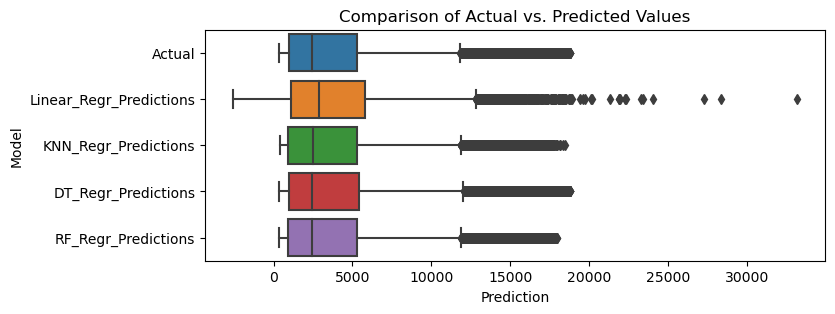

In [180]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=melted_df)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

In [174]:
# Build a Random Forest Regression Model which uses 'Cut', 'Color', 'Clarity' and 'Carat' only as input variable to predict the 'Price'.
# Apply 70-30 split and standardize/encode the data. 
# Report the Mean Absolute Error of the model.

In [182]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [184]:
#Defining input and output variables
XX=df.drop(columns=['depth','table','price','x','y','z'])
yy=df['price']

In [186]:
print(XX.head())

   carat      cut color clarity
0   0.23    Ideal     E     SI2
1   0.21  Premium     E     SI1
2   0.23     Good     E     VS1
3   0.29  Premium     I     VS2
4   0.31     Good     J     SI2


In [188]:
print(yy.head())

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [190]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

In [192]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy,test_size=0.30,random_state=0)

print(XX_train.shape,yy_train.shape)
print(XX_test.shape,yy_test.shape)

(37758, 4) (37758,)
(16182, 4) (16182,)


In [194]:
#Apply data preparation on train data:
XX_train.dtypes

carat      float64
cut         object
color       object
clarity     object
dtype: object

In [196]:
#Seperating Numerical and Categorical columns
XX_train_cat=XX_train.select_dtypes(include=['object'])
XX_train_num=XX_train.select_dtypes(include=['int64','float64'])

In [198]:
print(XX_train_cat.columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [200]:
print(XX_train_num.columns)

Index(['carat'], dtype='object')


In [202]:
XX_train_num.describe()

,carat
count,37758.000000
mean,0.798382
std,0.474686
min,0.200000
25%,0.400000
50%,0.700000
75%,1.040000
max,5.010000


In [208]:
print("Number of Categorical columns : ", XX_train_cat.columns.nunique())
print("Number of Numerical columns : ", XX_train_num.columns.nunique())

Number of Categorical columns :  3
Number of Numerical columns :  1


In [210]:
# Rescaling - Numerical Feature(column) - Transformation - Standardization

In [212]:
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()

In [218]:
XX_train_num_transform=pd.DataFrame(standard_scaler.fit_transform(XX_train_num),columns=standard_scaler.get_feature_names_out(),index=XX_train_num.index)

In [220]:
XX_train_num_transform.head()

,carat
16259,0.445813
24005,1.562356
12211,0.740749
37918,-0.818197
181,-0.544328


In [222]:
print("Number of Numerical Features:", standard_scaler.n_features_in_)
print("Feature Names:", standard_scaler.get_feature_names_out())
print("Mean of each column:", standard_scaler.mean_)
print("Std of each column:", np.sqrt(standard_scaler.var_))

Number of Numerical Features: 1
Feature Names: ['carat']
Mean of each column: [0.79838154]
Std of each column: [0.47467969]


In [226]:
XX_train_num_transform.describe().round(2)

,carat
count,37758.00
mean,-0.00
std,1.00
min,-1.26
25%,-0.84
50%,-0.21
75%,0.51
max,8.87


In [228]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [230]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [232]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [234]:
# Rescaling - Categorical Features Transformation - Ordinal Encoding

# Defining the order of categorical features (lowest to highest)

cut_cat = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cat = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cat = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [238]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[cut_cat, color_cat, clarity_cat],  handle_unknown="use_encoded_value",unknown_value=-1, encoded_missing_value=-5)


In [240]:
XX_train_cat_transform = pd.DataFrame(ordinal.fit_transform(XX_train_cat), columns=ordinal.get_feature_names_out(), index = XX_train_cat.index)

In [242]:
XX_train_cat_transform.head()

,cut,color,clarity
16259,4.0,3.0,4.0
24005,4.0,2.0,5.0
12211,2.0,5.0,1.0
37918,4.0,4.0,4.0
181,4.0,5.0,5.0


In [244]:
#Properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal.feature_names_in_)
print(" ")
print("Unique Categories:", ordinal.categories_)
print(" ")
print("Feature Names after encoding:", ordinal.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
 
Unique Categories: [array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]
 
Feature Names after encoding: ['cut' 'color' 'clarity']


In [246]:
XX_train_transform = pd.concat([XX_train_num_transform, XX_train_cat_transform], axis=1)

XX_train_transform.head()

,carat,cut,color,clarity
16259,0.445813,4.0,3.0,4.0
24005,1.562356,4.0,2.0,5.0
12211,0.740749,2.0,5.0,1.0
37918,-0.818197,4.0,4.0,4.0
181,-0.544328,4.0,5.0,5.0


In [248]:
# Apply data preparation on test data

In [250]:
# Separate Categorical and Numerical Features

XX_test_cat = XX_test.select_dtypes(include=['object'])
XX_test_num = XX_test.select_dtypes(include=['int64', 'float64'])

In [252]:
# Apply transformation on Numerical data

XX_test_num_transform = pd.DataFrame(standard_scaler.transform(XX_test_num), columns = standard_scaler.get_feature_names_out(), index = XX_test_num.index)

XX_test_num_transform.head()

,carat
10176,0.635415
16083,1.035685
13420,0.846083
20407,1.478088
8909,0.214078


In [254]:
# Apply transformation on Categorical data

XX_test_cat_transform = pd.DataFrame(ordinal.transform(XX_test_cat), columns = ordinal.get_feature_names_out(), index = XX_test_cat.index)

XX_test_cat_transform.head()

,cut,color,clarity
10176,4.0,2.0,1.0
16083,4.0,2.0,2.0
13420,3.0,1.0,2.0
20407,4.0,4.0,2.0
8909,2.0,4.0,3.0


In [256]:
# Concatinate XX_test_num_transform and XX_test_cat_transform

XX_test_transform = pd.concat([XX_test_num_transform, XX_test_cat_transform], axis=1)

XX_test_transform.head()

,carat,cut,color,clarity
10176,0.635415,4.0,2.0,1.0
16083,1.035685,4.0,2.0,2.0
13420,0.846083,3.0,1.0,2.0
20407,1.478088,4.0,4.0,2.0
8909,0.214078,2.0,4.0,3.0


In [258]:
# Training and Testing

In [260]:
# Randon Forest Regression

In [262]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

reg = RandomForestRegressor()
reg.fit(XX_train_transform, yy_train)

yy_test_pred = reg.predict(XX_test_transform)

print("Model's Error:", metrics.mean_absolute_error(yy_test, yy_test_pred))
print()

Model's Error: 300.08679554447866

CPU times: total: 8.55 s
Wall time: 8.78 s
